# Mel Schwan, Stuart Miller, Justin Howard, Paul Adams
# Lab Two: Classification

## MiniLab2 Project Requirments -
1. [Data Preparation](#DataPreparation)
    1. [Define and prepare your class variables](#Define)
    2. [Describe the final dataset that is used for classification/regression (include a
description of any newly formed variables you created](#FinalDataset)

2. [Modeling and Evaluation](#DataUnderstanding)
    1. [Choose and explain your evaluation metrics that you will use](#Evaluaation)
    2. [Choose the method you will use for dividing your data into training and
testing splits](#DivideData)
    3. [Create three different classification/regression models](#Models)
    4. [Analyze the results using your chosen method of evaluation](#Analyze)
    5. [Discuss the advantages of each model for each classification task](#Advantages)
    6. [Which attributes from your analysis are most important](#Attributes)
    
3. [Deployment](#Deployment)
    1. [How useful is your model for interested parties (i.e., the companies or
organizations that might want to use it for prediction)? How would you measure the
model's value if it was used by these parties? How would your deploy your model for
interested parties? What other data should be collected? How often would the model
need to be updated, etc.?](#Value)


In MiniLab2 we will build upon the predictive analysis (classification) that we already completed in the MiniLab1, adding additional modeling from new classification algorithms as well as
more explanations that are inline with the CRISP-DM framework. We will use appropriate cross
validation for all of our analysis and explain our method of performance validation in detail.


<img src="./crisps-dm2.png" style="width:550px;height:450px"/>


# 1. Stage Three - Data Preperation (Q1)   <a class="anchor" id="DataPreparation"></a>
We will use the Home Credit Default Risk dataset made available on Kaggle to develop a useful model that predicts loan defaults for a majority of the loan applicants whose population is defined by the given training and test datasets. Predicting loan defaults is essential to the profitability of banks and, given the competitive nature of the loan market, a bank that collects the right data can offer and service more loans. This analysis of Home Credit's Default Risk dataset will focus on generating accurate loan default risk probabilities, identifying sub-populations among the given applicants, and finally, the most critical factors that indicate that an applicant will likely default on their loan.

FROM TEMPLATE
This is the stage of the project where you decide on the data that you're going to use for analysis. The criteria you might use to make this decision include the relevance of the data to your data mining goals, the quality of the data, and also technical constraints such as limits on data volume or data types. Note that data selection covers selection of attributes (columns) as well as selection of records (rows) in a table.

## 1.1 Define and prepare your class variables (Q1A)<a class="anchor" id="Define"></a>

Home Credit is an international non-bank financial institution that operates in 10 countries and focuses on lending to people with little or no credit history. This institution has served 11 million customers, is based in the Czechia, and is a significant consumer lender in most of the Commonwealth of Independent States Countries, especially Russia. Recently, it has established a presence in China and the United States. The dataset provided is extensive, representing 307,511 applications from various locations. 

The data types vary in scale and type, from time-series credit histories to demographic indicators. Our analysis will focus on two datasets, data collected in the application train and test datasets, and several engineered features gathered from the millions of credit bureau records for each loan applicant.

In [1]:
import os
os.chdir('c:/users/howar/documents/machine_learning1/home-credit-default-risk')
# Import Libraries Required.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy import stats

#removing warnings
import warnings
warnings.simplefilter('ignore')

In [2]:
# loading data that was preprocessed using the custom read_clean_data() function, 
# merged with the previously engineered newFeatures from Lab 1 

data = pd.read_csv('data.csv', na_values = 'XNA')

In [3]:
data.CNT_FAM_MEMBERS.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  9.,  7.,  8., 10., 13., 14., 12.,
       20., 15., 16., 11.])

The dataset contains features, such as the number of children an applicant has, where the number of unique values are relatively high, but the percentage of the total makeup is almost imperceptable. The distributions of these high cardinality variables are heavily skewed. To address this issue, the number of numeric categories was reduced to get a more accurate interpretation of their impact on the target variable.

In [4]:
#recoding high cardinality features

# reducing the child count feature to 3 categories
def cnt_child(series):
    if series == 0 :
        return 'No Children'
    elif 1 <= series < 5 :
        return '1-4 Children'
    else :
        return '5 or More Children'
data['cnt_child'] = data.CNT_CHILDREN.apply(cnt_child).astype('category')

# reducing family count feature to 4 categories
def cnt_family(series):
    if series == 1:
        return '1 Family Member'
    elif series == 2: 
        return '2 Family Members'
    elif 3 >= series <= 5:
        return '3 - -5 Family Members'
    else :
        return '6 or more Family Members'
data['cnt_family'] = data.CNT_FAM_MEMBERS.apply(cnt_family).astype('category')

# reducing engineered feature CREDIT_ACTIVE to 4 categories
data.CREDIT_ACTIVE = data.CREDIT_ACTIVE.astype(np.uint32)

def credit_active(series):
    if series == 0:
        return 'No Accounts'
    elif 1 <= series <= 3:
        return '1-3 Accounts'
    else : 
        return ' > 4 Accounts'
data['credit_active'] = data.CREDIT_ACTIVE.apply(credit_active).astype('category')

# reducing engineered feature LOAN_COUNT to 5 categories

def loan_count(series):
    if series == 0:
        return 'No Loans'
    elif 1 <= series <= 2:
        return '1-2 Loans'
    elif 3 <= series <= 5:
        return '3-5 Loans'
    elif 6 <= series <= 10:
        return '6-10 Loans'
    else : 
        return ' > 10 Loans'

data['loan_cnt'] = data.LOAN_COUNT.apply(loan_count).astype('category')

In [5]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,CREDIT_INCOME_RATIO,ANNUITY_INCOME_RATIO,PERCENT_EMPLOYED_TO_AGE,LOAN_COUNT,CREDIT_ACTIVE,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,16036.995067,1954.848123,...,3.957570,0.180929,0.128615,4.765114,1.762275,3.447496,9.259305e+05,5.402757e+05,1.742709e+04,1.671665e+02
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,2307.068896,...,2.689728,0.094572,0.135117,4.496199,1.804891,76.067471,2.075933e+06,1.514174e+06,8.410842e+04,1.395571e+04
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.004808,0.000224,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-6.978830e+06,-5.798541e+05,0.000000e+00
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,289.000000,...,2.018667,0.114785,0.021559,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,1213.000000,...,3.265067,0.162833,0.088645,4.000000,1.000000,0.000000,2.878200e+05,8.305380e+04,0.000000e+00,0.000000e+00
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,2760.000000,...,5.159880,0.229064,0.191000,7.000000,3.000000,0.000000,1.058400e+06,5.228865e+05,0.000000e+00,0.000000e+00
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,17912.000000,...,84.736842,1.875965,0.728811,116.000000,32.000000,5250.000000,3.347397e+08,3.344983e+08,8.126600e+06,3.756681e+06


 ## 1.2 Describe the final dataset that is used for classification/regression (Q1b) <a class="anchor" id="FinalDataset"></a>


Fill

In [6]:
# dropping variables that were deemed the least useful for analysis
new_df = data.copy().drop(['TARGET', 'SK_ID_CURR', 'AMT_GOODS_PRICE', 'CNT_CHILDREN',
                          'CNT_FAM_MEMBERS', 'EXT_SOURCE_1_AV','EXT_SOURCE_2_AV', 'EXT_SOURCE_3_AV', 'LOAN_COUNT',
                          'CREDIT_ACTIVE'], axis = 1)

# adding drop_first = True eliminates the duplication of categorical features that are already binary indicators
new_df = pd.get_dummies(new_df, drop_first = True)
pd.options.display.max_columns = 400
new_df.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EMPLOYED,CREDIT_INCOME_RATIO,ANNUITY_INCOME_RATIO,PERCENT_EMPLOYED_TO_AGE,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,FLAG_MOBIL_Y,FLAG_EMP_PHONE_Y,FLAG_WORK_PHONE_Y,FLAG_CONT_MOBILE_Y,FLAG_PHONE_Y,FLAG_EMAIL_Y,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_None,OCCUPATION_TYPE_Pensioner,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,REG_REGION_NOT_LIVE_REGION_Y,REG_REGION_NOT_WORK_REGION_Y,LIVE_REGION_NOT_WORK_REGION_Y,REG_CITY_NOT_LIVE_CITY_Y,REG_CITY_NOT_WORK_CITY_Y,LIVE_CITY_NOT_WORK_CITY_Y,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_None,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGA

In [7]:
sc = StandardScaler()
sc.fit(new_df)
X_train_std = sc.transform(new_df) 
X_train_std.shape

(307511, 190)

In [8]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nTop Ten Eigenvalues \n%s' % eigen_vals[0:9])


Top Ten Eigenvalues 
[8.02919762 3.66167126 3.37104958 3.078287   2.67276752 2.496448
 2.44310956 2.3120201  2.17191233]


In [9]:
# calculating the total var explained and cumulative variance
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse =True)]
cum_var_exp = np.cumsum(var_exp)
len(var_exp)
len(cum_var_exp)
print("Variance Explained length: " + str(len(var_exp)), "\nCumulative Variance Explained length : " + str(len(cum_var_exp)))

Variance Explained length: 190 
Cumulative Variance Explained length : 190


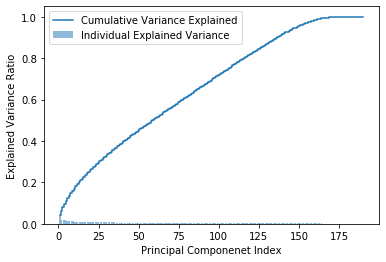

In [10]:
#plotting
import matplotlib.pyplot as plt

plt.bar(range(1,191), var_exp, alpha = .5, align = 'center', label = 'Individual Explained Variance')

plt.step(range(1,191), cum_var_exp, where = 'mid', label = 'Cumulative Variance Explained')

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Componenet Index')
plt.legend(loc='best')
plt.show()

To capture at least 80% of the variability in the dataset, we must include at least 100 principal components. We will pair the eigenvectors with their corresponding eigenvalues and project them onto a 2 dimensional subspace and observe the results.

In [17]:
# making a listof (eigenvalues, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

#sort the (eigenvalue, eigenvector) tuples from high to low
"""eigen_pairs[0] is equivalent to the single eigenvalue for PC1 and the eigenvector that represents the 190 features of the data"""
eigen_pairs.sort(key=lambda k: k[0], reverse = True)

#collecting the two eigenvectors that correspond to the two largest eigenvalues

W = np.hstack((eigen_pairs[0][1][:,np.newaxis],
               eigen_pairs[1][1][:,np.newaxis]))

# printing the first 5 pairs
print('Matrix W: \n', W[:5])

Matrix W: 
 [[-0.03468048 -0.11699092]
 [-0.03120791 -0.27040719]
 [-0.04791114 -0.25118962]
 [-0.0056498  -0.17896428]
 [ 0.24526023 -0.10544484]]


We can use this matrix to transform the training set into new features and plot them. First, we will observe the first 2 Principal Components with a logistic regression-based decision boundary to view the discriminatory ability of a logistic model using the Principal Components.

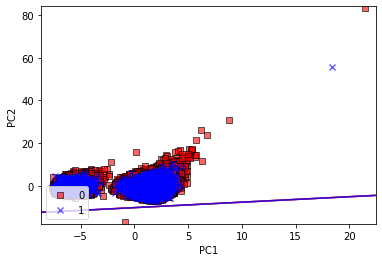

In [20]:
#helper script
from plot_decision_regions import plot_decision_regions
# other packages
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

#transforming training data
X_train_pca = X_train_std.dot(W)

# identifying labels
y_train = data.TARGET

#initializing the PCA transformer and logistic regression estimator:
pca = PCA(n_components =2)
lr = LogisticRegression(multi_class = 'ovr',
                        random_state = 1,
                        solver = 'lbfgs')
# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train_std)
#fitting the logitistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier = lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'lower left')
plt.show()

From this plot, we can see that class separation is very poor and non-linear. We have two centroids where each has only a slight concentric-ellipse type of separation between the two classes. The decision boundary drawn by a logistic model is clearly unable to use the first two principal compoenents to discriminate between defaults and non-defaulted loans.

We can also attempt to view the value of the third principal component to see if there is good separation when a third dimension is added.

In [21]:
# getting three principal components
W3 = np.hstack((W,eigen_pairs[2][1][:,np.newaxis]))
W3.shape

(190, 3)

In [22]:
#transforming training data
X_train_pca3 = X_train_std.dot(W3)
X_train_pca3.shape

(307511, 3)

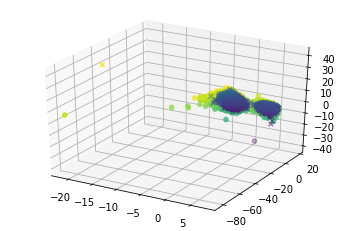

In [23]:
# 3-d plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


colors = ['r','g']
markers = ['o', 'x']

# for each index and class in:
for idx, cl in enumerate(np.unique(y_train)):
    ax.scatter3D(X_train_pca3[y_train == cl, 0],
                X_train_pca3[y_train == cl, 1],
                X_train_pca3[y_train == cl, 2],
                label = cl,  
                c = X_train_pca3[y_train == cl, 2],
                cmap = 'viridis',
                marker = markers[idx])

A three dimensional plot of the data does provide some insights. Defaults can be separated along the third dimension, as indicated by the defaults being clustered in the blue region and the non-defaults being clustered in the green/yellow regions  of the third Principal Component. The overlap between the classes is so signficant that the boundary line is not clear.

To solve this problem, we will apply sampling strategies that will clarify the class boundaries.

## 2.  Stage Four - Modeling and Evaluation (Q2) <a class="DataUnderstanding" id="EDA"></a>

## 2.1 Choose and explain your evaluation metrics (Q2A) <a class="anchor" id="Evaluaation"></a>


Due to the significant overlap between the classes in our dataset, we have elected to evaluate our models using the recall metric. Recall is the ratio of accurately predicted defaults to total defaults, which allows us to extract value from the model. 

We will provide an example of why we deemed this necessary.

Below is a Gradient Boosting Machines model that uses the entire dataset to make class predictions:

In [24]:
 # enabling sklearn's experimental gradient boosting machine algorithm
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
 # now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier().fit(X_train_std, y_train)
clf.score(X_train_std, y_train)

0.9200548923453145

An accuracy of 92% is deceptive. The significant imbalance of the dataset creates this deception. The goal of the analysis is to build a model capable of predicting loan defaults. If we remember that over 90% of the loans in the dataset were in good standing, we can then understand how our model can easily achieve an accuracy of at least 90% by sheer coincidence. 

We will now observe the recall of the trained model:

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train_std, y_train, cv = 5, scoring = 'recall')

array([0.01268882, 0.01248741, 0.01067472, 0.01309164, 0.01530715])

The recall ability of this model ranges from 1.1% to 1.3%. This reveals that the model is useless for predicting loan defaults. 

We will experiment with various resampling strategies until significant improvements are made.

## 2.2 Choose the method you will use for dividing your data (Q2B) <a class="anchor" id="Describedata"></a>

We are using an 80/20 training : test set split.

As previously mentioned in section 1.2 (Data Description) we concluded that it was necessary to implement a sampling strategy on the training set in order to make a useful model for predicting loan defaults. 

As a justification of the use of a generic sampling strategy with this dataset, we will provide an example of the effectiveness of simple Randum Under Sampling.

In [26]:
from imblearn.under_sampling import RandomUnderSampler
X = X_train_std
y = data.TARGET
rus = RandomUnderSampler(random_state = 1)
X_rus, y_rus = rus.fit_resample(X,y)
y_rus.shape

(49650,)

In [27]:
clf = HistGradientBoostingClassifier().fit(X_rus, y_rus)
clf.score(X_rus, y_rus)

0.7256193353474321

In [28]:
cross_val_score(clf, X_rus, y_rus, cv = 5, scoring = 'recall')

array([0.68257805, 0.68801611, 0.67693857, 0.67452165, 0.68559919])

Applying random under-sampling of the majority class permits the gradient boosting algorithm to better define the class differences. Our ability to detect loans that enter default status increased over 60%.

## 2.3  Create three different classification/regression models (Q2C) <a class="anchor" id="Models"></a>



Fill

## 2.4 Analyze the results using your chosen method of evaluation (Q2D) <a class="anchor" id="Analyze"></a>


Fill

## 2.5 Discuss the advantages of each model for each classification task (Q2E) <a class="anchor" id="Advantages"></a>


Fill

## 2.6 Which attributes from your analysis are most important (Q2F) <a class="anchor" id="Attributes"></a>


Fill

# 3. Stage Five - Deployment (Q3) <a class="anchor" id="Deployment"></a>

## 3.1 How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.? (Q3A) <a class="anchor" id="Value"></a>

